## Create a 3 * 3 Numpy matrix and normalize it using both row-wise and column-wise normalization

In [62]:
import numpy as np

a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [65]:
row_min = a.min(axis = 1, keepdims = True)
#print(row_min)
row_max = a.max(axis = 1, keepdims = True)
#print(row_max)
row_normalized = (a - row_min)/(row_max - row_min)
print(row_normalized)

col_min = a.min(axis = 0, keepdims = True)
#print(row_min)
col_max = a.max(axis = 0, keepdims = True)
#print(row_max)
col_normalized = (a - col_min)/(col_max - col_min)
print(col_normalized)

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


## 5. Using pandas , read a CSV file and disply only those rows where a numeric column value is greater than the columns mean

In [66]:
import pandas as pd
data = {'A': [10,20,30,25], 'B': [1,2,3,4]}
df = pd.DataFrame(data)

In [67]:
df

,A,B
0,10,1
1,20,2
2,30,3
3,25,4


In [68]:
df.to_csv('data_csv', index = False)

In [69]:
df1 = pd.read_csv('data_csv')

In [70]:
df1

,A,B
0,10,1
1,20,2
2,30,3
3,25,4


In [71]:
mean_A = df['A'].mean()
mean_A

np.float64(21.25)

In [72]:
filtered_A = df[df['A'] > mean_A]
filtered_A

,A,B
2,30,3
3,25,4


In [73]:
mean_B = df['B'].mean()
mean_B
filtered_B = df[df['B'] > mean_B]
filtered_B

,A,B
2,30,3
3,25,4


In [74]:
filtered_df1 = df1[(df1 > df1.mean())]
filtered_df1

,A,B
0,NaN,NaN
1,NaN,NaN
2,30.0,3.0
3,25.0,4.0


## 6. Plot a line chart using matplotlib showing monthly sales and overlay a rolling average using a sec axis

In [81]:
df_new = pd.DataFrame({'month': pd.date_range('2024-01-01', periods= 12, freq= 'M'),
                  'sales': [120, 130, 125, 140, 150, 160, 155, 165, 170, 180, 190, 200]})

C:\Users\user\AppData\Local\Temp\ipykernel_10472\1013301735.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_new = pd.DataFrame({'month': pd.date_range('2024-01-01', periods= 12, freq= 'M'),


In [82]:
df_new

,month,sales
0,2024-01-31,120
1,2024-02-29,130
2,2024-03-31,125
3,2024-04-30,140
4,2024-05-31,150
5,2024-06-30,160
6,2024-07-31,155
7,2024-08-31,165
8,2024-09-30,170
9,2024-10-31,180


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
new = df_new['sales'].mean()

In [85]:
df_new['rolling_avg'] = df_new['sales'].rolling(3).mean()

In [86]:
df_new['rolling_avg']

0            NaN
1            NaN
2     125.000000
3     131.666667
4     138.333333
5     150.000000
6     155.000000
7     160.000000
8     163.333333
9     171.666667
10    180.000000
11    190.000000
Name: rolling_avg, dtype: float64

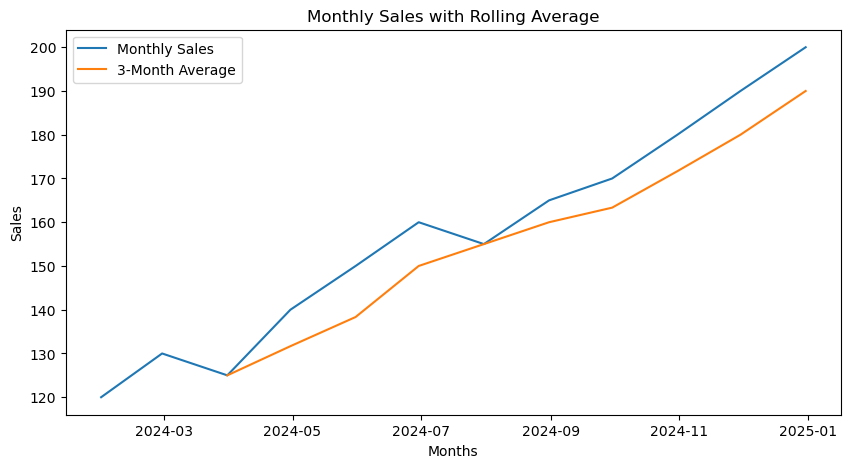

In [92]:
plt.figure(figsize=(10, 5))

plt.plot(df_new['month'], df_new['sales'], label='Monthly Sales')
plt.plot(df_new['month'], df_new['rolling_avg'], label='3-Month Average')

plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales with Rolling Average')
plt.legend()
plt.show()

## 7. Using seaborn's tips dataset, create a scatter plot with regression line showing the relationship between the total bill and tip

In [93]:
df_11 = sns.load_dataset('tips')


In [94]:
df_11

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

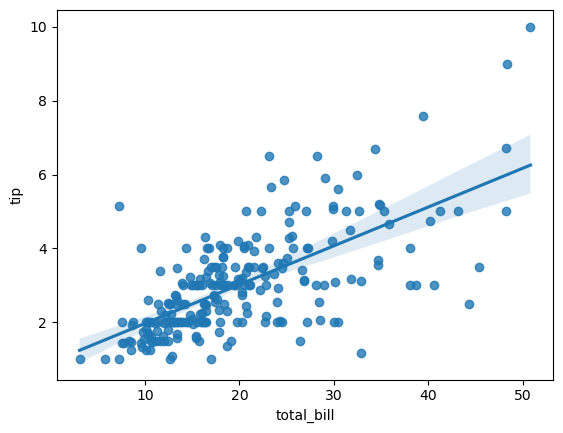

In [95]:

sns.regplot(x = df_11['total_bill'], y = df_11['tip'])